<a href="https://colab.research.google.com/github/muradhani/pytorch/blob/main/pytorch_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

what will covered :
1. data prepation
2. bulid model 
3. fitting the model and make prediction 
4. make predection and evaluate the model
5. saving and loading the model 
6. putting all together 


In [ ]:
#pytorch workflow 
import torch 
from torch import nn #contain all of pytorch buliding blocks for neural networks
import matplotlib.pyplot as plt


# 1. data preparing and loading

machine learning is a game of two parts 
1. get data into numerical representation 
2. bulid model to learn patterns in that numerical representation 

In [ ]:
#create known parameters
weight = 0.7
bias = 0.3

#create 
start = 0 
end = 1 
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim = 1)
y = weight * X + bias 

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) , len(y)

(50, 50)



#splitting data into training and test data
generalization is the ability for ml learning model to perform well on data it hasnt seen before .


In [ ]:
#splitting data into training and test data 
#create a train test split 
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train , y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

#how to better visualize the data 

In [ ]:
#visualize function of data 
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data , train_labels , c="b" , s=4 , label="training data")
  
  #plot test data in green 
  plt.scatter(test_data , test_labels,c="g",s=4,label="testing data")

  #are there predictions ?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  #show the legend
  plt.legend(prop={"size":14});

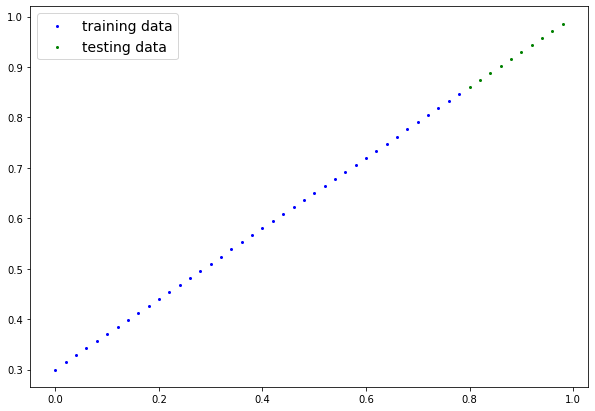

In [ ]:
plot_predictions()

#build first pytorch model 


In [ ]:
#create linear regression model class 
from torch import nn 
class LinearRegressionModel(nn.Module): #every thing in pytorch inheret from nn.Module
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,requires_grad=True , dtype=torch.float))
      self.bias   = nn.Parameter(torch.randn(1,requires_grad=True , dtype=torch.float))

  #forward method to define the computation in the model 
  def forward(self,x:torch.Tensor)->torch.Tensor: #x is the input data
    return self.weights * x + self.bias #this the linear regresion formula

In [ ]:
#checking the content of pytorch model 
#create a random seed
torch.manual_seed(42)
#create instance of the model 
model_0 = LinearRegressionModel()
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#making prediction using torch.inference_mode()
with torch.inference_mode(): # remove tracking of gradinet because in this case we not making training , prediction will be too much faster
  y_preds = model_0(X_test)

y_preds
 #we can also make something similar with no grad however infernece_mode( ) is preferred 
with torch.no_grad(): # remove tracking of gradinet because in this case we not making training , prediction will be too much faster
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

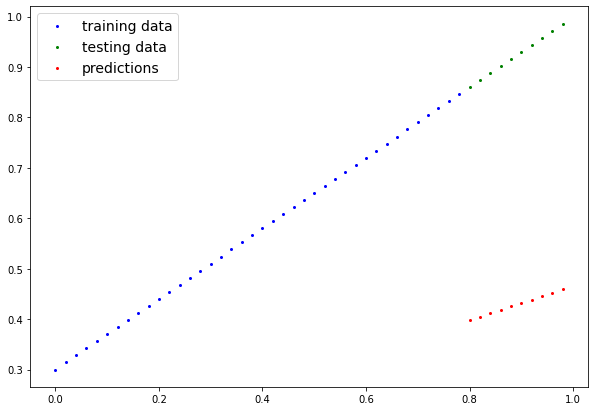

In [ ]:
plot_predictions(predictions=y_preds)

# 3. train model 
the whole idea of training is for a model to move from some *unkown* parameters (may be random) to some *known* parameters
in the other word is poor representaion of data to better representation of data 

one way to measure how poor or how worng your models predictions are is to use a loss function

note : loss function may also called cost function or criterion in different areas. 

#things we need to train : 
**loss function** a function to measure how worng your model predeicion are to the ideal outputs , lower is better 

**optimiazer** take into account the loss of a model and adjusts the models parameter to imporve the loss function 

and specifically for pytorch we need : 
* training loop
* testing loop 

In [ ]:
 #3- train model 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#check out model parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#setup loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.01  ) #lr learning rate is the most important hyperparamrer you can set

#buliding a training loop and testing loop in pytorch 

In [ ]:
import torch
torch.manual_seed(42)
#epoch is one loop through the data ( this is a hyperparameter because we set it ourselves)
epochs = 100
#these lists help to tracking model progress
epoch_count = []
train_loss_values = []
test_loss_values = []
#triaining
# 0 loop through the data 
for epoch in range(epochs):
  #set model to training mode
  model_0.train() #train mode in pytorch set all paramters that require gradients to require gradients  
  #1-forward pass
  y_pred = model_0(X_train)

  #2-calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"loss {loss}")
  #3-optimizer zero grad
  optimizer.zero_grad()

  #4-perform bakc propagation on the loss with the respect to the parameters of the model
  loss.backward() 

  #5-step the optimizer(perform gradient descent)
  optimizer.step() #by deafult the optimiazer change will accumulate through the loop so we have to zero them in step 3 above

  model_0.eval() #turn off graident tracking(turn off different settings in the model not needed for evaluation/testing (dropout/batchnorm)) to make our code faster
  
  with torch.inference_mode(): #inference mode is better than torch.no_grad
    #1. do forward pass 
    test_pred = model_0(X_test)

    #2-calculate the losss
    test_loss = loss_fn(test_pred,y_test)
  #print out whats happening
  if epoch % 10 ==0:  
    print(f"Epoch: {epoch} | loss: {loss} | test loss : {test_loss}")
    #print out model state_dict()
    print(model_0.state_dict())

loss 0.31288138031959534
Epoch: 0 | loss: 0.31288138031959534 | test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss 0.3013603389263153
loss 0.28983935713768005
loss 0.2783183455467224
loss 0.26679736375808716
loss 0.2552763521671295
loss 0.24375534057617188
loss 0.23223432898521423
loss 0.22071333229541779
loss 0.20919232070446014
loss 0.1976713240146637
Epoch: 10 | loss: 0.1976713240146637 | test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss 0.18615034222602844
loss 0.1746293306350708
loss 0.16310831904411316
loss 0.1515873372554779
loss 0.14006635546684265
loss 0.1285453587770462
loss 0.11702437698841095
loss 0.1060912236571312
loss 0.09681284427642822
loss 0.08908725529909134
Epoch: 20 | loss: 0.08908725529909134 | test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss 0.08227583020925522
loss 0.07638873159885406
l

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  

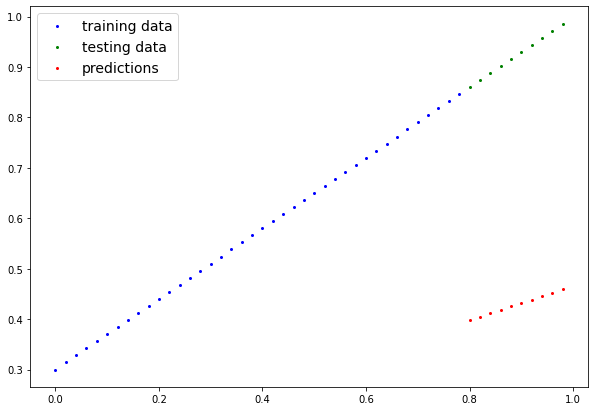

In [ ]:
plot_predictions(predictions = y_preds)

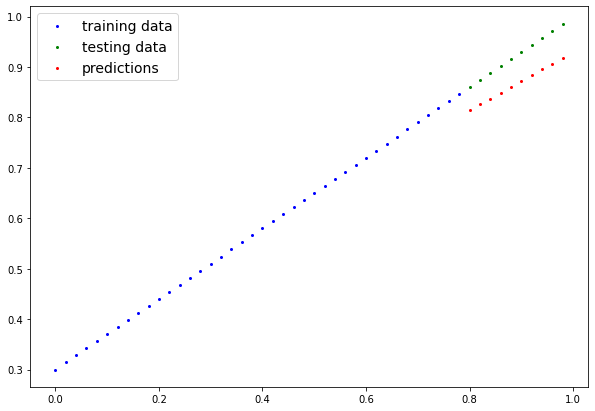

In [ ]:
plot_predictions(predictions = y_preds_new)

#saving model in pytorch
threee main methods for saving and loading models in pytorch

1. torch.save() allow to save a pytoch object in pickle format
2. torch.load() allow you to load a saved pytorch object
3. torch.nn.Module.load_state_dict() this allow you to load a models saved state dictionary


In [ ]:
#saving our pytorch model
from pathlib import Path 

#1- create a model directory 
model_path = Path('models')
model_path.mkdir(parents=True , exist_ok= True)

#2 create model save path 
model_name = '01_pytroch_workflow_model_0.pth'
model_save_path = model_path / model_name

#3- saving model
print(f"saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict() , f=model_save_path)

saving model to: models/01_pytroch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jan 25 23:07 01_pytroch_workflow_model_0.pth


#scince we saved our model state_dict() rather the entire model , we will create a new instance of our model class and load the saved state_dict() into that

In [ ]:
#load models
loaded_model_0 = LinearRegressionModel()
#load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
#to sure the 2 models are indentical we can compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

#putting every thing together

In [ ]:
from torch import nn
import matplotlib.pyplot as plt 

create device agnostic code 
this mean if we've got access to a GPU , our code will use it 
- if no gpu avaliabe code deafult use cpu 

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")


using device: cuda


In [ ]:
#putting together part 1 preparing data
#create some data using the linear regression formula of y = weigth * x + bias 
weight = 0.7 
bias = 0.3

#create reange values 
start = 0 
end = 1 
step = 0.02

#create x and y (features and labels)
X = torch.arange(start , end , step).unsqueeze(dim=1) # without unsqueez errors will pop up 
y = weight * X + bias 

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data 
train_split = int(.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split] 
X_test , y_test = X[train_split:] , y[train_split:] 
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

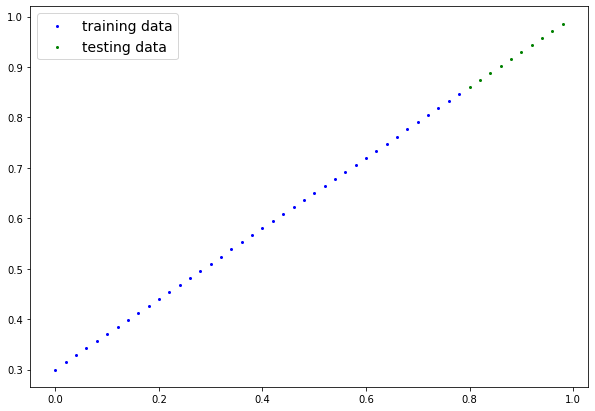

In [ ]:
#plot the data 
#if you dont have plot_predictions() function loaded , this will error
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
#6.2 buliding a pytorch Linear model
from torch import nn
import torch
class LinearRegressionModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
  def forward(self,x:torch.Tensor)->torch.Tensor: 
    return self.linear_layer(x) 

#set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModelv1()
model_1 , model_1.state_dict()

(LinearRegressionModelv1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#train the model 
#set model to use target device 
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set model to use target device 
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

training code 
we need : 
1. loss function (measure how wronge our model is )
2. optimizer (is to optimize model paramters to reduce the loss function )
3. training loop 
4. test loop

In [ ]:
#setup the loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr = 0.01 )#lr how big the step the optimizer take to change our parameters every iteration
#the params is the parameter we want the optimizer to optimize  

In [ ]:
#trining loop 
torch.manual_seed(42)

epochs = 200

#put data into target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#-------------------------------------------------------
for epoch in range(epochs) :
  model_1.train()

  #1-forward pass to make predications
  y_pred = model_1(X_train)

  #2- calculate the loos 
  loss = loss_fn(y_pred , y_train)

  #3- optimizer zero grad
  optimizer.zero_grad() #because every step is accmulate the grades so we want to zero it to remove other grades 

  #4- perform backpropagation
  loss.backward()

  #5- optimizer step
  optimizer.step()

  #testing 
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

    #print out what is happening
    if epoch % 10 == 0 :
      print(f"epoch : {epoch} | loss : {loss} | test loss : {test_loss}")

epoch : 0 | loss : 0.5551779866218567 | test loss : 0.5739762187004089
epoch : 10 | loss : 0.439968079328537 | test loss : 0.4392664134502411
epoch : 20 | loss : 0.3247582018375397 | test loss : 0.30455657839775085
epoch : 30 | loss : 0.20954833924770355 | test loss : 0.16984669864177704
epoch : 40 | loss : 0.09433845430612564 | test loss : 0.03513690456748009
epoch : 50 | loss : 0.023886388167738914 | test loss : 0.04784907028079033
epoch : 60 | loss : 0.019956795498728752 | test loss : 0.045803118497133255
epoch : 70 | loss : 0.016517987474799156 | test loss : 0.037530567497015
epoch : 80 | loss : 0.013089174404740334 | test loss : 0.02994490973651409
epoch : 90 | loss : 0.009653178043663502 | test loss : 0.02167237363755703
epoch : 100 | loss : 0.006215683650225401 | test loss : 0.014086711220443249
epoch : 110 | loss : 0.00278724217787385 | test loss : 0.005814164876937866
epoch : 120 | loss : 0.0012645035749301314 | test loss : 0.013801801018416882
epoch : 130 | loss : 0.001264503

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#making and evaluating predictions
#1- tirn model into evaluation mode
model_1.eval()

#make prediction on the test data 
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

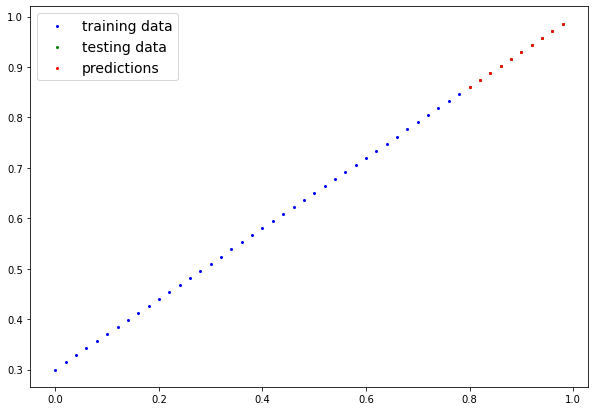

In [ ]:
#check model prediction 
plot_predictions(predictions = y_preds.cpu())

In [ ]:
#6.5 saving and loading and model 
from pathlib import Path 

model_path =Path("new_models") 
model_path.mkdir(parents = True , exist_ok=True)

model_name = "linear_model.pth"
model_save_path = model_path / model_name
torch.save(obj=model_1.state_dict(),f=model_save_path)

In [ ]:
#reload model 
loaded_model1 = LinearRegressionModelv1()
loaded_model1.load_state_dict(torch.load(f=model_save_path))
loaded_model1.to(device)

LinearRegressionModelv1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model1.state_dict() , model_1.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

In [ ]:
#evaluate loaded model 
loaded_model1.eval()

with torch.inference_mode():
  loaded_model1_preds = loaded_model1(X_test)

y_preds == loaded_model1_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')